In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import glob

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

### Analysis of Divergent Virus simulations

This script should work for both Illumina and Nanopore simulations (depending on the configurations for data location set in the cell below)

In [26]:
baseline_data = "./data/BASELINE/virus_simulation/"
new_data = "./data/NEW/virus_simulation/"
metric = 'rpm' #bpm if ONT, rpm if ILMN

manifest = {'lassa_virus': 'Mammarenavirus', 
            'nipah_virus': 'Henipavirus',
            'rhinovirus_C': 'Enterovisu',
            'sars_cov_2': 'Betacoronavirus',
            'human_betaherpesvirus_5':'Cytomegalovirus',
            'hepatitis_B_virus': 'Orthohepadnavirus'}

In [27]:
def synthesize_virus_results(directory, metric):

    all_results = {}
    min_results = {}
    for file in glob.glob(baseline_data + "*.csv"):
        #print("---")

        parsed_name = file.split('/')[-1].split('_')
        divergence = int(parsed_name[-3].split('m')[1])
        virus_name = '_'.join(parsed_name[0:-3])

        if virus_name not in all_results.keys():
            all_results[virus_name] = {}
            min_results[virus_name] = {}
            min_results[virus_name]['min_detection_nt'] = 0
            min_results[virus_name]['min_detection_nr'] = 0

        all_results[virus_name][divergence] = {}

        input_df = pd.read_csv(file)
        genus_df = input_df[input_df.tax_level == 2]

        genus_df = input_df[input_df.name == manifest[virus_name]]

        nt_rpm = genus_df['nt_' + metric][0]
        nr_rpm = genus_df['nr_' + metric][0]

        all_results[virus_name][divergence]['nt_' + metric]=nt_rpm
        all_results[virus_name][divergence]['nr_' + metric]=nr_rpm

        if nt_rpm > 0:
            if divergence > min_results[virus_name]['min_detection_nt']:
                min_results[virus_name]['min_detection_nt'] = divergence
        if nr_rpm > 0:
            if divergence > min_results[virus_name]['min_detection_nr']:
                min_results[virus_name]['min_detection_nr'] = divergence

    print(all_results)
    
    df_list = []
    df_names = []
    for i in all_results.keys():
        df_names.append(i)
        df_names.append(i)
        df_list.append(pd.DataFrame(all_results[i]))

    full_df = pd.concat(df_list)
    full_df.index = [df_names[i] + '_' + full_df.index[i] for i in range(len(full_df.index))]
    full_df
    print(full_df)
    
    #plot of minimum divergences
    min_res_df = pd.DataFrame(min_results)
    print(min_res_df)
    min_res_df.plot(kind='bar')
    
    return([all_results, full_df, min_results])

{'nipah_virus': {5: {'nt_rpm': 391509.43396226416, 'nr_rpm': 325471.6981132076}, 15: {'nt_rpm': 297169.8113207547, 'nr_rpm': 259433.96226415093}, 10: {'nt_rpm': 485849.0566037736, 'nr_rpm': 358490.56603773584}}, 'lassa_virus': {20: {'nt_rpm': 140000.0, 'nr_rpm': 320000.0}, 10: {'nt_rpm': 352000.0, 'nr_rpm': 344000.0}, 15: {'nt_rpm': 308000.0, 'nr_rpm': 428000.0}, 25: {'nt_rpm': 48000.0, 'nr_rpm': 348000.0}}}
                               5              10             15        20  \
nipah_virus_nt_rpm  391509.433962  485849.056604  297169.811321       NaN   
nipah_virus_nr_rpm  325471.698113  358490.566038  259433.962264       NaN   
lassa_virus_nt_rpm            NaN  352000.000000  308000.000000  140000.0   
lassa_virus_nr_rpm            NaN  344000.000000  428000.000000  320000.0   

                          25  
nipah_virus_nt_rpm       NaN  
nipah_virus_nr_rpm       NaN  
lassa_virus_nt_rpm   48000.0  
lassa_virus_nr_rpm  348000.0  
                  nipah_virus  lassa_virus
min_

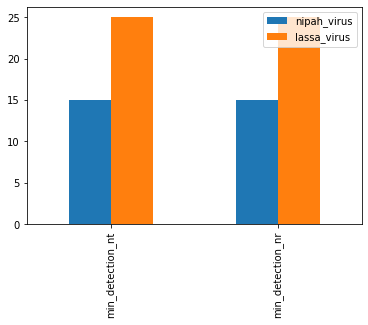

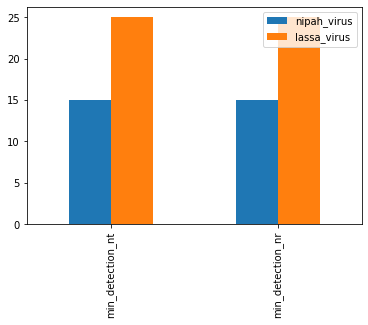

In [28]:
baseline_results = synthesize_virus_results(baseline_data, metric)
new_results = synthesize_virus_results(new_data, metric)

In [29]:
# palette from here: https://flatuicolors.com/palette/us
official_colors = ['#55efc4','#00b894', #greens 
                   '#81ecec','#00cec9', #teals
                   '#74b9ff','#0984e3', #blues
                   '#a29bfe','#6c5ce7', #purples
                   '#ffeaa7','#fdcb6e', #yellows
                   '#fab1a0', '#e17055', #oranges
                   '#ff7675', '#d63031', #reds
                   '#fd79a8', '#e84393', #pinks
                   '#dfe6e9', '#b2bec3', '#636e72', '#2d3436' #greys
                  ]

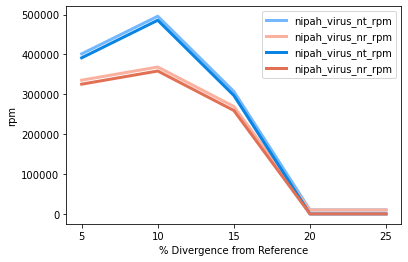

In [30]:
# Figure 3A (or S5A, if nanopore data)

baseline_full = baseline_results[1]
baseline_full.fillna(0, inplace=True)
new_full = new_results[1]
new_full.fillna(0, inplace=True)

a=(baseline_full.loc[['nipah_virus_nt_' + metric, 'nipah_virus_nr_' + metric]]+10000).transpose().plot(color = [official_colors[4], official_colors[10]], lw=3, figsize=(6,4)) #style={'nipah_virus_nt_rpm': '*-r', 'nipah_virus_nr_rpm': '*:r'}
new_full.loc[['nipah_virus_nt_' + metric, 'nipah_virus_nr_' + metric]].transpose().plot(color = [official_colors[5], official_colors[11]], ax=a, lw=3) #style={'nipah_virus_nt_rpm': '*-b', 'nipah_virus_nr_rpm': '*:b'}, 
plt.xticks([5, 10, 15, 20, 25])
plt.xlabel('% Divergence from Reference')
plt.ylabel(metric)
plt.show()


{'new_nt': {'nipah_virus': 25, 'lassa_virus': 35}, 'baseline_nt': {'nipah_virus': 15, 'lassa_virus': 25}, 'new_nr': {'nipah_virus': 25, 'lassa_virus': 35}, 'baseline_nr': {'nipah_virus': 15, 'lassa_virus': 25}}


Text(0, 0.5, '% Divergence - Limit of Detection')

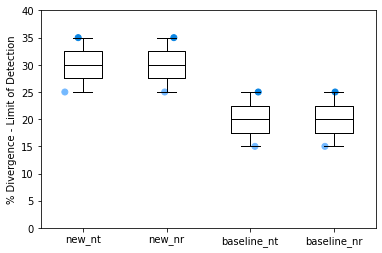

In [31]:
# Figure 3B (or S5A, if nanopore data)

min_results_baseline = baseline_results[2]
min_results_new = new_results[2]
min_results_new

all_mins = {}

for i in ['nt', 'nr']:
    all_mins['new_'+i] = {}
    all_mins['baseline_'+i] = {}
    
    for j in min_results_new:
        all_mins['new_'+i][j] = min_results_new[j]['min_detection_' + i] + 10
        
    for j in min_results_baseline:
        all_mins['baseline_'+i][j] = min_results_baseline[j]['min_detection_' + i]

print(all_mins)
lod_df = pd.DataFrame(all_mins)


lod_df_column_order = ['new_nt', 'new_nr', 'baseline_nt', 'baseline_nr']
lod_df[lod_df_column_order].boxplot(showfliers=False, color='black', figsize=(6,4))
for i, d in enumerate(lod_df[lod_df_column_order]):
    y = lod_df[d]
    x = np.random.normal(i + 1, 0.08, len(y))
    plt.scatter(x, y, color = official_colors[4:6])
plt.grid(False)
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35, 40])
plt.ylabel('% Divergence - Limit of Detection')
#plt.title('Limit of Detection Across All \n Simulated Divergent Viruses')


In [32]:
# From Text...
# "the median limit of detection using the compressed database was XX (range XX - XX) for NT 
# and XX (range XX - XX) for NR"

print("NT limit of detection NEW: ")
print(str(np.mean(lod_df['new_nt'])) + ' (range = ' + str(np.min(lod_df['new_nt'])) + ' - ' + str(np.max(lod_df['new_nt'])) + ')')

print("NR limit of detection NEW: ")
print(str(np.mean(lod_df['new_nr'])) + ' (range = ' + str(np.min(lod_df['new_nr'])) + ' - ' + str(np.max(lod_df['new_nr'])) + ')')



print("NT limit of detection OLD: ")
print("NT: " + str(np.mean(lod_df['baseline_nt'])) + ', range = ' + str(np.min(lod_df['baseline_nt'])) + ' - ' + str(np.max(lod_df['baseline_nt'])))

print("NR limit of detection OLD: ")
print("NR: " + str(np.mean(lod_df['baseline_nr'])) + ', range = ' + str(np.min(lod_df['baseline_nr'])) + ' - ' + str(np.max(lod_df['baseline_nr'])))




NT limit of detection NEW: 
30.0 (range = 25 - 35)
NR limit of detection NEW: 
30.0 (range = 25 - 35)
NT limit of detection OLD: 
NT: 20.0, range = 15 - 25
NR limit of detection OLD: 
NR: 20.0, range = 15 - 25
